# 02-stretch-hist.ipynb

In [1]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import napari
import numpy as np
from pathlib import Path
from skimage import exposure, filters, util
# Local imports
import helpers

In [2]:
# Open napari window
viewer = napari.Viewer()

Note: You may need to put an "r" before the image directory path if the string contains backslashes. Don't forget commas between parameters!

In [3]:
img_dir = Path(
        r'X:\Radiography Drive\2013-11_APS'
        r'\Clarke_2013_November\048_Sn27Bi_100')
img_start = 352
img_stop = 372
img_step = 1
imgs = helpers.get_imgs(
    img_dir,
    img_start=img_start,
    img_stop=img_stop,
    img_step=img_step,
    # n_imgs=20,
    print_nums=True
)
viewer.add_image(imgs, name=f'imgs-{img_start}-{img_stop}-{img_step}')

Loading 20 images...
Images loaded:
['0: 352', '1: 353', '2: 354', '3: 355', '4: 356', '5: 357', '6: 358', '7: 359', '8: 360', '9: 361', '10: 362', '11: 363', '12: 364', '13: 365', '14: 366', '15: 367', '16: 368', '17: 369', '18: 370', '19: 371']


<Image layer 'imgs-352-372-1' at 0x196e0059250>

In [4]:
beam_img_dir = Path(
        r"X:\Radiography Drive\2013-11_APS"
        r"\Clarke_2013_November\036_MonoBeam")
beam_imgs = [
        iio.imread(path) for path in beam_img_dir.glob('*.tif')
        if 'AVG' not in path.stem]
print(len(beam_imgs))
beam_imgs = np.stack(beam_imgs)
print(f'{beam_imgs.shape=}')

105
beam_imgs.shape=(105, 1024, 1280)


In [5]:
print(f'{beam_imgs.shape=}')
print(f'{beam_imgs.dtype=}')
avg_beam_img = np.mean(beam_imgs, axis=0)
avg_beam_img = exposure.rescale_intensity(
        avg_beam_img, in_range=np.uint16, out_range=float)
print(f'{avg_beam_img.shape=}')
print(f'{avg_beam_img.dtype=}')
print(f'{avg_beam_img.min()=}')
print(f'{avg_beam_img.max()=}')
viewer.add_image(avg_beam_img, name='avg uint16')

beam_imgs.shape=(105, 1024, 1280)
beam_imgs.dtype=dtype('uint16')
avg_beam_img.shape=(1024, 1280)
avg_beam_img.dtype=dtype('float64')
avg_beam_img.min()=0.00711448262833019
avg_beam_img.max()=0.06248569466697185


<Image layer 'avg uint16' at 0x196d5c66190>

In [6]:
# Subtract liquid image from data (float)
imgs_float = util.img_as_float(imgs)
imgs_float_liq_sub = imgs_float - imgs_float[0, :, :]
print(f'{imgs_float_liq_sub.dtype=}')
print(f'{imgs_float_liq_sub.min()=}')
print(f'{imgs_float_liq_sub.max()=}')
viewer.add_image(imgs_float_liq_sub, name='imgs_sub (float)')

imgs_float_liq_sub.dtype=dtype('float64')
imgs_float_liq_sub.min()=-0.014908064393072403
imgs_float_liq_sub.max()=0.021484702830548562


<Image layer 'imgs_sub (float)' at 0x196d6e9cb50>

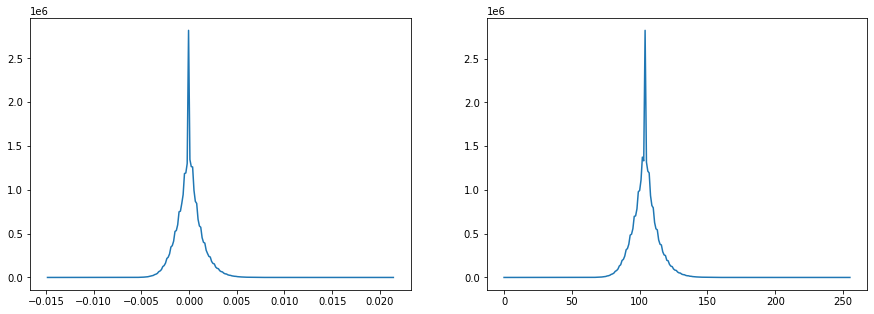

<Image layer 'imgs_sub (uint8)' at 0x196d6c07f40>

In [7]:
vals_sub, bins_sub = exposure.histogram(imgs_float_liq_sub)
imgs_sub_uint8_resc = exposure.rescale_intensity(
        imgs_float_liq_sub, in_range='image', out_range='uint8')
vals_sub_uint8, bins_sub_uint8 = exposure.histogram(imgs_sub_uint8_resc)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
ax = axes.ravel()
ax[0].plot(bins_sub, vals_sub)
ax[1].plot(bins_sub_uint8, vals_sub_uint8)
plt.show()
viewer.add_image(imgs_sub_uint8_resc, name='imgs_sub (uint8)')

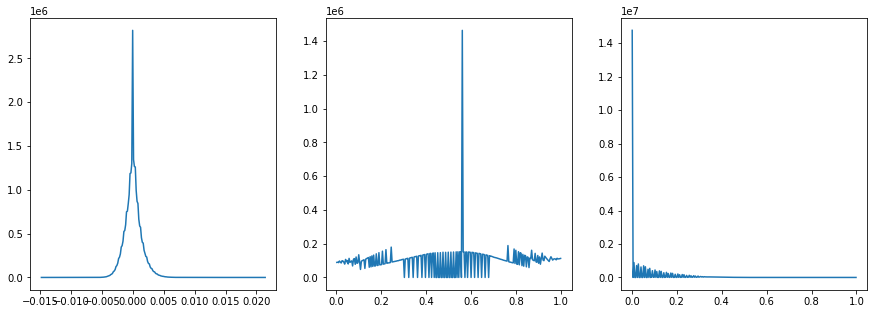

<Image layer 'imgs_sub_adapteq' at 0x196d6589430>

In [8]:
imgs_sub_eq = exposure.equalize_hist(imgs_float_liq_sub)
vals_sub_eq, bins_sub_eq = exposure.histogram(imgs_sub_eq)
imgs_sub_adapteq = exposure.equalize_adapthist(imgs_float_liq_sub)
vals_sub_adapteq, bins_sub_adapteq = exposure.histogram(imgs_sub_adapteq)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()
ax[0].plot(bins_sub, vals_sub)
ax[1].plot(bins_sub_eq, vals_sub_eq)
ax[2].plot(bins_sub_adapteq, vals_sub_adapteq)
plt.show()
viewer.add_image(imgs_sub_eq)
viewer.add_image(imgs_sub_adapteq)

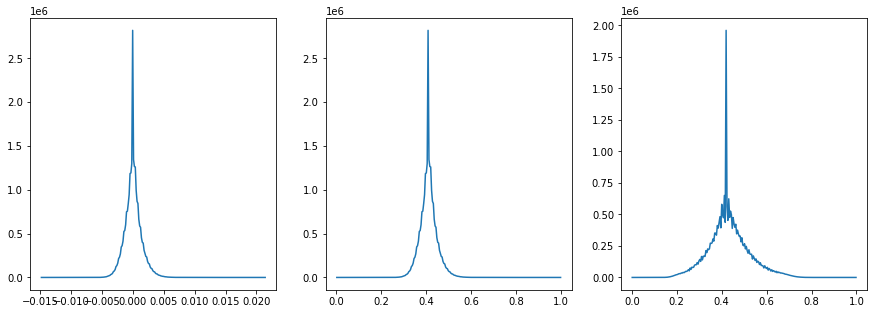

<Image layer 'imgs_sub_0to1_adapteq' at 0x196d6538730>

In [9]:
imgs_sub_0to1 = exposure.rescale_intensity(
        imgs_float_liq_sub, in_range='image', out_range=(0, 1))
vals_sub_0to1, bins_sub_0to1 = exposure.histogram(imgs_sub_0to1)
imgs_sub_0to1_adapteq = exposure.equalize_adapthist(imgs_sub_0to1)
vals_sub_0to1_adapteq, bins_sub_0to1_adapteq = exposure.histogram(
        imgs_sub_0to1_adapteq)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
ax = axes.ravel()
ax[0].plot(bins_sub, vals_sub)
ax[1].plot(bins_sub_0to1, vals_sub_0to1)
ax[2].plot(bins_sub_0to1_adapteq, vals_sub_0to1_adapteq)
plt.show()
viewer.add_image(imgs_sub_0to1_adapteq)

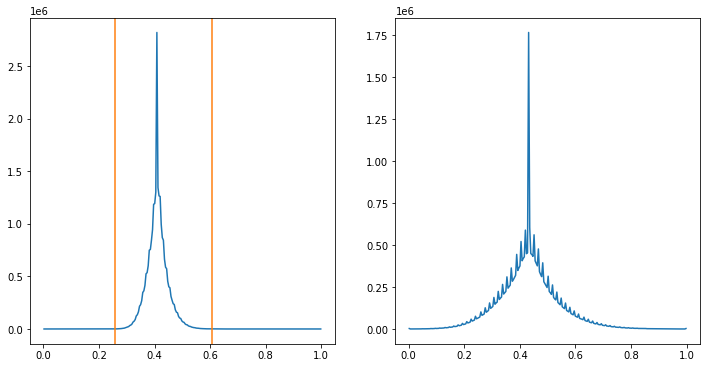

<Image layer 'imgs_sub_stretched [1]' at 0x196e4fca5e0>

In [25]:
p_low_0to1, p_high_0to1 = np.percentile(imgs_sub_0to1, (0.01, 99.99))
imgs_sub_stretched = exposure.rescale_intensity(
        imgs_sub_0to1, in_range=(p_low_0to1, p_high_0to1), out_range=(0, 1))
vals_sub_stretched, bins_sub_stretched = exposure.histogram(
        imgs_sub_stretched)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()
ax[0].plot(bins_sub_0to1, vals_sub_0to1)
ax[0].axvline(p_low_0to1, c='C1')
ax[0].axvline(p_high_0to1, c='C1')
ax[1].plot(bins_sub_stretched, vals_sub_stretched)
plt.show()
viewer.add_image(imgs_sub_stretched)

## Compare median-filtered images

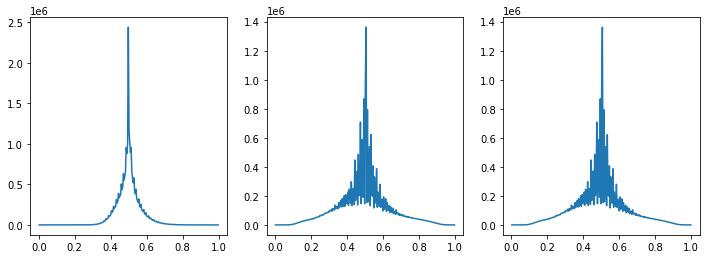

<Image layer 'imgs_med_sub_0to1_adapteq_uint8' at 0x196e4fcaa30>

In [27]:
# Median-filter images before liquid subtraction
imgs_float = util.img_as_float(imgs)
imgs_med_sub = (
        filters.median(imgs_float) - filters.median(imgs_float[0, :, :]))
imgs_med_sub_0to1 = exposure.rescale_intensity(
        imgs_med_sub, in_range='image', out_range=(0, 1))
vals_med_sub_0to1, bins_med_sub_0to1 = exposure.histogram(
        imgs_med_sub_0to1)
imgs_med_sub_0to1_adapteq = exposure.equalize_adapthist(imgs_med_sub_0to1)
vals_med_sub_0to1_adapteq, bins_med_sub_0to1_adapteq = exposure.histogram(
        imgs_med_sub_0to1_adapteq)
imgs_med_sub_0to1_adapteq_uint8 = exposure.rescale_intensity(
        imgs_med_sub_0to1_adapteq, in_range='image', out_range='uint8')
vals_med_sub_0to1_adapteq_uint8, bins_med_sub_0to1_adapteq_uint8 = (
        exposure.histogram(imgs_med_sub_0to1_adapteq))
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
ax = axes.ravel()
ax[0].plot(bins_med_sub_0to1, vals_med_sub_0to1)
ax[1].plot(bins_med_sub_0to1_adapteq, vals_med_sub_0to1_adapteq)
ax[2].plot(bins_med_sub_0to1_adapteq_uint8, vals_med_sub_0to1_adapteq_uint8)
plt.show()
viewer.add_image(imgs_med_sub_0to1)
viewer.add_image(imgs_med_sub_0to1_adapteq)
viewer.add_image(imgs_med_sub_0to1_adapteq_uint8)

In [10]:
def save_as_pngs(save_dir, imgs):
    save_dir = Path(save_dir)
    if not save_dir.is_dir():
        save_dir.mkdir()
    else:
        raise ValueError(f'Directory already exists: {save_dir}')
    exp_name = save_dir.stem
    n_imgs = imgs.shape[0]
    n_digits = len(str(n_imgs))
    for i in range(n_imgs):
        iio.imwrite(
                Path(save_dir) / f'{exp_name}_{str(i).zfill(n_digits)}.png',
                imgs[i, :, :])

In [29]:
if False:
    save_dir = Path(
        r'C:\Users\gusb\Research\aps-directional'
        r'\results\048_Sn27Bi_100-352-372-1_med-filt_liq-sub_adapt-eq')
    save_as_pngs(save_dir, imgs_med_sub_0to1_adapteq_uint8)

In [12]:
if False:
    helpers.save_as_gif(
        (
            f'results/{img_dir.stem}-{img_start}-{img_stop}-{img_step}'
            f'_beam-norm_liq-sub.gif'
        ),
        imgs_sub_uint_resc,
        equalize_hist=False,
        fps=5
    )